# Spotify Track Analysis Tutorial


## Introduction

With the introduction of streaming, through services such as Spotify and Apple Music, music has never been more personalized and accesible. Explicit songs have always been placed under intense scrutiny and thus since 1990, the Parental Advisory: Explicit Lyrics label has been placed on physical copies of songs, thus somewhat limiting its access to the general public. However, with the advent of streaming services, we're going to explore what makes songs popular on Spotify based on several factors such as:
- Explictness
- Danceability
- Speechiness
- Duration

## Set Up

Below provides all the packages you'll need in order to peform the data science.
There may be some packages that may not be recognizable to you. For example, the package opendatasets helps download datasets.

In [2]:
!pip install opendatasets

     |████████████████████████████████| 58 kB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 4.5 MB/s eta 0:00:01
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73053 sha256=d4ebfbc7860731010d8ebadadbafd4feab7c139678db58f1ff83cec6c83acdc2
  Stored in directory: /home/jovyan/.cache/pip/wheels/29/da/11/144cc25aebdaeb4931b231e25fd34b394e6a5725cbb2f50106
Successfully built kaggle


In [12]:
import opendatasets as od
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Accessing the Data

In order to download this dataset, you will need to have a Kaggle account and generate an API token, if one does not exist. 

In [3]:
od.download('https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: michellefab
Your Kaggle Key: ········


  0%|          | 0.00/195M [00:00<?, ?B/s]

100%|██████████| 195M/195M [00:13<00:00, 15.4MB/s] 


In [4]:
tfile = 'spotify-dataset-19212020-160k-tracks/tracks.csv'
tracks = pd.read_csv(tfile)
print(tracks.shape)
tracks.head()

(586672, 20)


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


After loading the data, we discover that there 586,672 rows (in this case, there are 586,672 tracks) and 20 columns (those tracks' attributes) within the tracks dataset. Because of the large size of the dataset, we will not be using the entirety of the dataset and thus some of the data will be left out of our analysis.

# Tidy the Data

Datasets can often having missing data which can impact our analysis, so before we begin analyzing the data, we want to check if the tracks dataset has any missing data.

In [5]:
tracks.isnull().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [6]:
tracks['release_date'].head(20)

0     1922-02-22
1     1922-06-01
2     1922-03-21
3     1922-03-21
4           1922
5           1922
6           1922
7           1922
8           1922
9     1922-03-29
10    1922-06-01
11    1922-06-01
12    1922-02-22
13          1922
14          1922
15    1922-06-01
16    1922-06-01
17    1922-06-01
18          1922
19    1922-03-21
Name: release_date, dtype: object

Based on initial dataset, there are some columns within the Tracks dataset that need to be cleaned, for example, the release data isn't consistent as some rows include the day & month of the track release and others just include the year of release. Thus to streamline the data, we will be only considering the year of release. 

In [7]:
tracks['release_date'] = tracks['release_date'].str[:4].astype(int)
tracks.head(10)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
5,0BRXJHRNGQ3W4v9frnSfhu,Ave Maria,0,178933,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.227,0.2610,5,-12.343,1,0.0382,0.994,0.247000,0.0977,0.0539,118.891,4
6,0Dd9ImXtAtGwsmsAD69KZT,La Butte Rouge,0,134467,0,['Francis Marty'],['2nuMRGzeJ5jJEKlfS7rZ0W'],1922,0.510,0.3550,4,-12.833,1,0.1240,0.965,0.000000,0.1550,0.7270,85.754,5
7,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,['Mistinguett'],['4AxgXfD7ISvJSTObqm4aIE'],1922,0.563,0.1840,4,-13.757,1,0.0512,0.993,0.000016,0.3250,0.6540,133.088,3
8,0IgI1UCz84pYeVetnl1lGP,Old Fashioned Girl,0,310073,0,['Greg Fieler'],['5nWlsH5RDgFuRAiDeOFVmf'],1922,0.488,0.4750,0,-16.222,0,0.0399,0.620,0.006450,0.1070,0.5440,139.952,4
9,0JV4iqw2lSKJaHBQZ0e5zK,Martín Fierro - Remasterizado,0,181173,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922,0.548,0.0391,6,-23.228,1,0.1530,0.996,0.933000,0.1480,0.6120,75.595,3


In [37]:
tracks_ex = tracks[tracks.explicit != 0]
tracks_ex.reset_index(drop=True, inplace=True)
tracks_ex.index = tracks_ex.index + 1
tracks_ex.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
1,4hdd7F7FNY5NjCAvejKKW1,"""Pimpin n tha Year 3000""",14,200600,1,['Suga Free'],['7AjokpCIqf0gHMZJlodw2k'],2012,0.894,0.733,5,-11.750,0,0.1490,0.431000,0.000004,0.0961,0.8740,117.653,4
2,7j62EokyWHxc9SgsacndQG,Rolling Stoners,7,122026,1,['Water Rats'],['5codaAuj2EoR8fZOe7JCSH'],2017,0.628,0.948,9,-4.449,1,0.0365,0.289000,0.000002,0.3570,0.7650,132.050,4
3,5LdDTmiaQb9dv9GbnekPWL,3000 Years,0,245362,1,['Mordab'],['1jRUpUgDQ5nseXl7kBjaPA'],2011,0.286,0.943,6,-5.173,1,0.2140,0.000048,0.201000,0.1140,0.4780,179.738,4
4,04OjnEpeFNwciB46XQjTxB,Year 3000,0,189415,1,['Kyim Jordan'],['35RkNbpKm66BEWBlssJolu'],2019,0.790,0.459,7,-11.523,1,0.2810,0.922000,0.024400,0.1270,0.1540,123.959,4
5,5ktxxpbNCxOSbGq9ZNIcRU,Year 3000,2,41750,1,['Water Rats'],['5codaAuj2EoR8fZOe7JCSH'],2017,0.378,0.999,11,-2.787,0,0.1010,0.117000,0.000011,0.4210,0.0776,161.434,4


In [46]:
tracks_ne = tracks[tracks.explicit == 0]
tracks_ne.reset_index(drop=True, inplace = True)
tracks_ne.index = tracks_ne.index + 1
tracks_ne.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
1,6Pkt6qVikqPBt9bEQy8iTz,A Lover's Concerto,41,159560,0,['The Toys'],['6lH5PpuiMa5SpfjoIOlwCS'],2020,0.671,0.867,2,-2.706,1,0.0571,0.436,0.000000,0.1390,0.839,120.689,4
2,1hx7X9cMXHWJjknb9O6Ava,The September Of My Years - Live At The Sands ...,26,187333,0,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],2018,0.319,0.201,7,-17.796,1,0.0623,0.887,0.000000,0.9040,0.239,117.153,3
3,19oquvXf3bc65GSqtPYA5S,It Was A Very Good Year - Live At The Sands Ho...,25,236800,0,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],2018,0.269,0.129,7,-18.168,0,0.0576,0.938,0.000005,0.6830,0.160,82.332,3
4,55qyghODi24yaDgKBI6lx0,"The Circle Game - Live at The 2nd Fret, Philad...",18,313093,0,['Joni Mitchell'],['5hW4L92KnC6dX9t7tYM4Ve'],2020,0.644,0.212,11,-14.118,1,0.0347,0.881,0.000022,0.7980,0.441,117.072,3
5,00xemFYjQNRpOlPhVaLAHa,"Urge For Going - Live at The 2nd Fret, Philade...",18,295093,0,['Joni Mitchell'],['5hW4L92KnC6dX9t7tYM4Ve'],2020,0.627,0.184,1,-15.533,1,0.0450,0.955,0.000162,0.0986,0.299,115.864,4


# Exploratory Data Analysis

Examining the relationship between the popularity of songs vs the identified aspects. The Exploratory Data Analysis step is a chance to examine the dataset to identify patterns within the dataset. Occasionally, while examining the dataset you may find that different features may not be related at all.

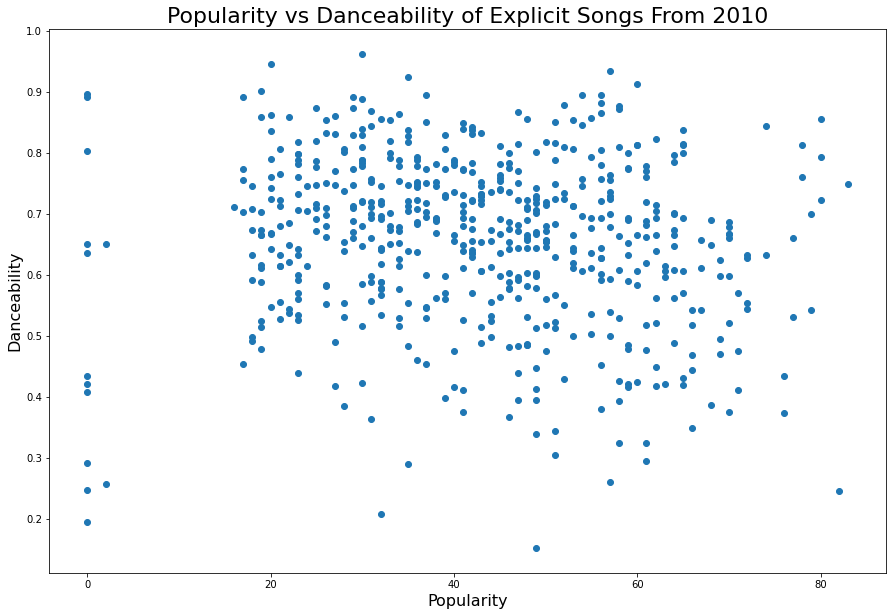

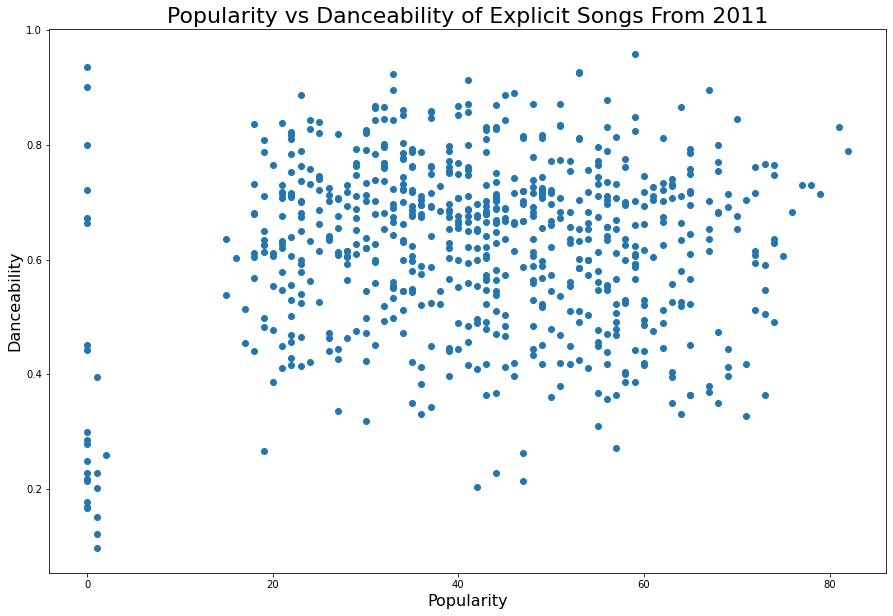

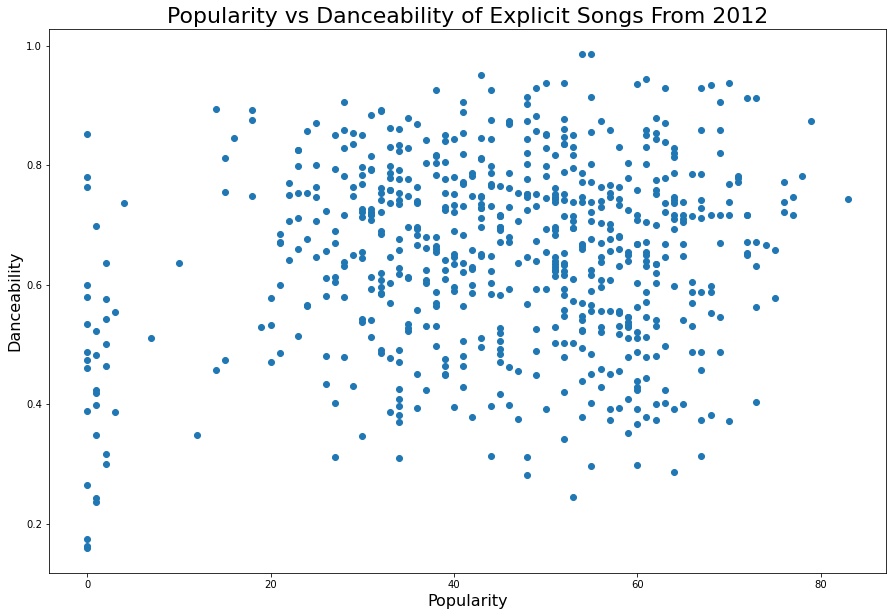

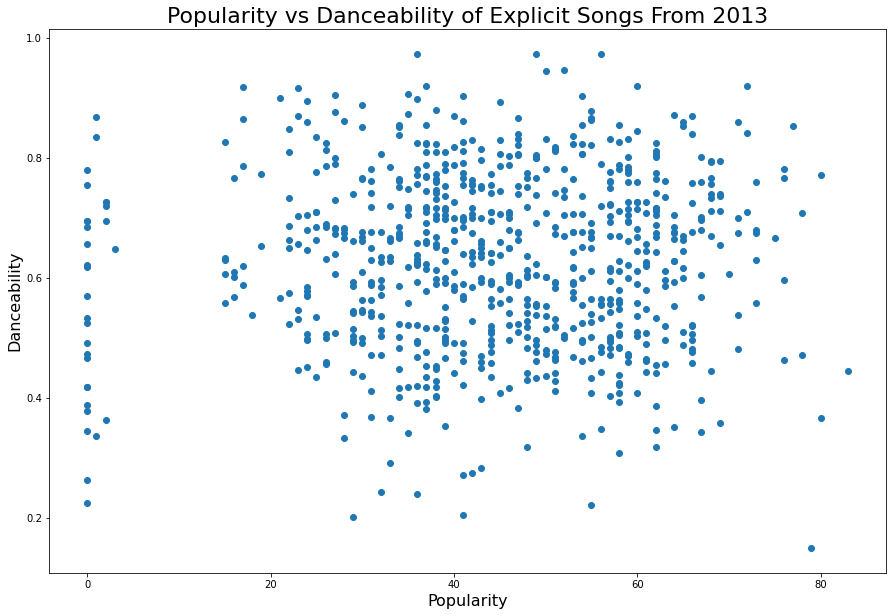

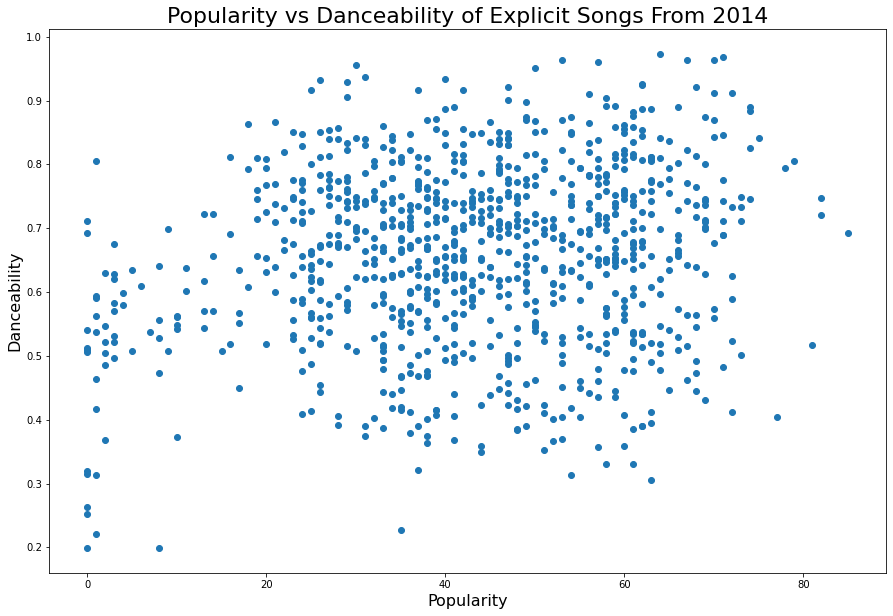

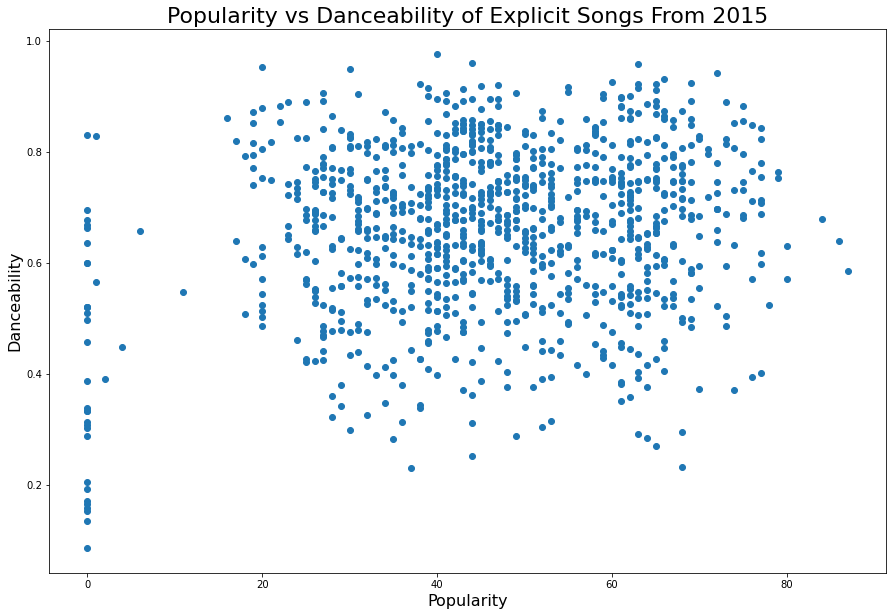

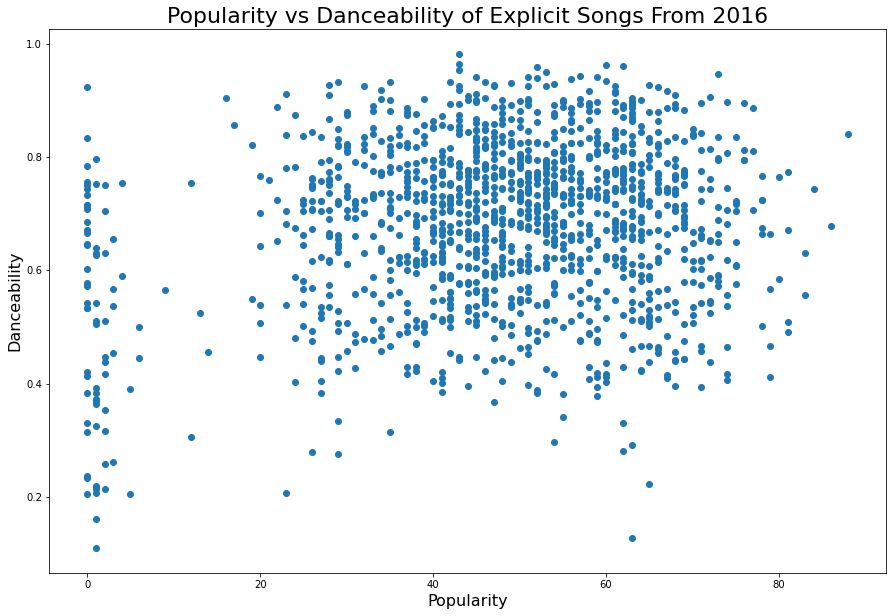

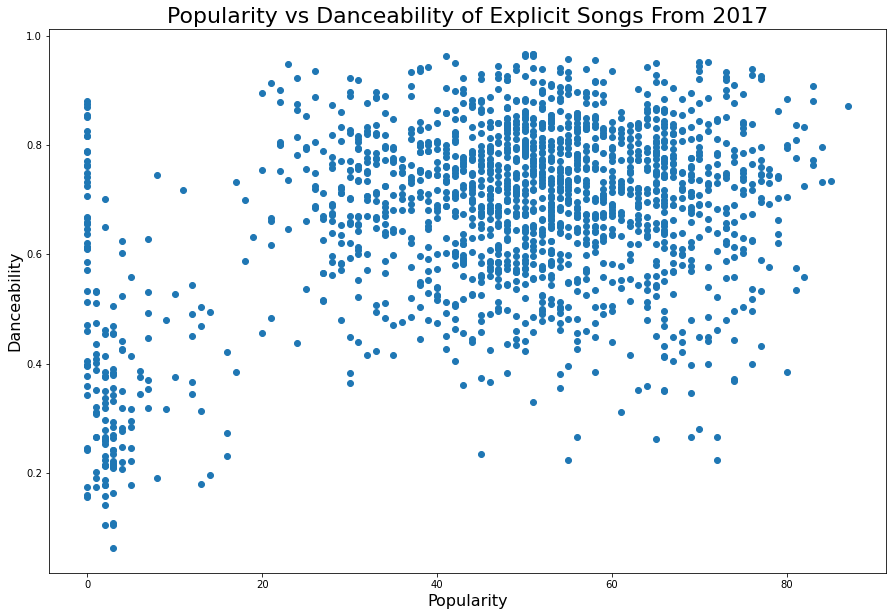

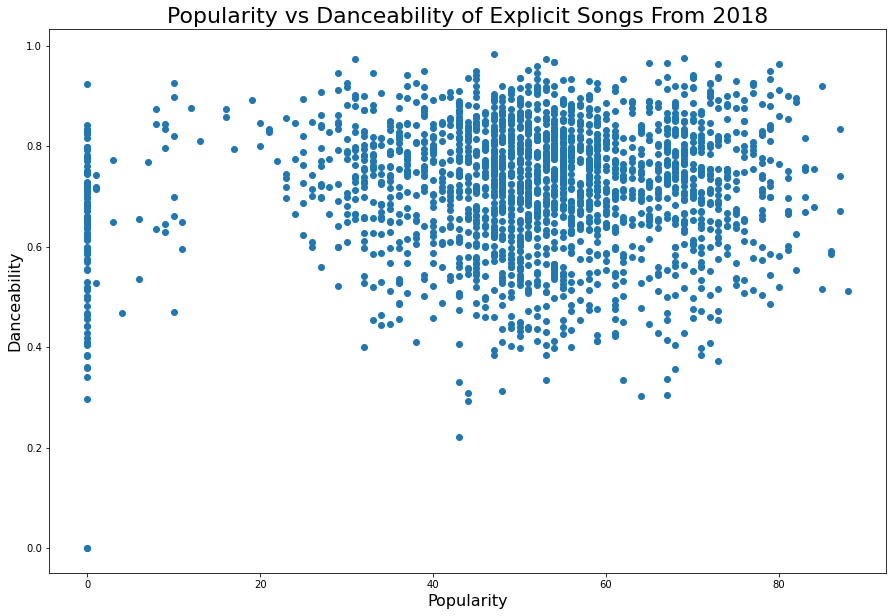

In [45]:
years = range(2010, 2019)
for i in years:
    by_year = tracks_ex[tracks_ex['release_date'] == i]
    fig = plt.figure(figsize=(15, 10))
    plt.scatter(x = by_year['popularity'], y = by_year['danceability'])
    plt.ylabel('Danceability', size = 16)
    plt.xlabel('Popularity', size = 16)
    plt.title('Popularity vs Danceability of Explicit Songs From ' + str(i), size = 22)
    by_year = pd.DataFrame()

We've looked at the relationship between Popularity and Danceability amongst explicit tracks over the past 10 years from 2010 to 2019 however there is no relationship between Popularity vs. Danceability. Let's see if the same result occurs when we look at the relationship between Popularity and Danceability amongst non-explict tracks.

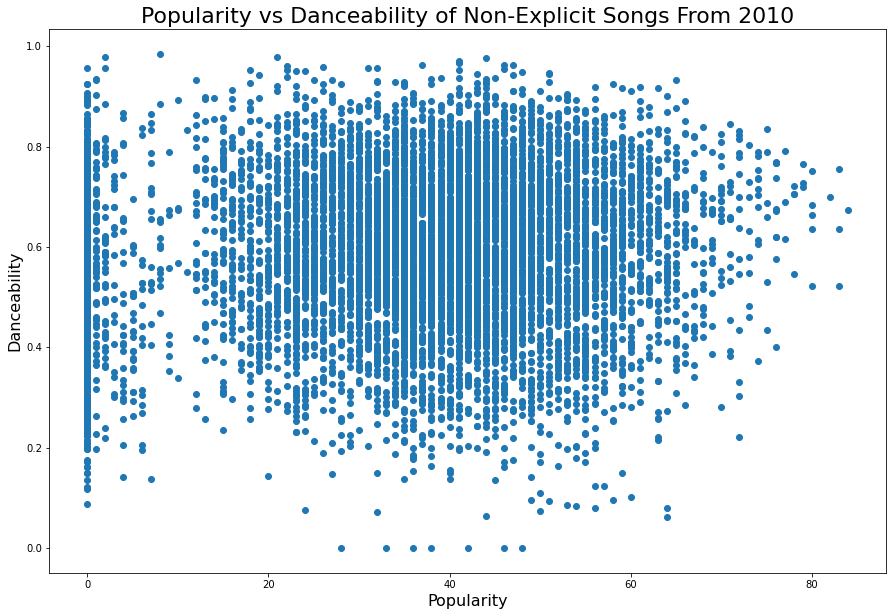

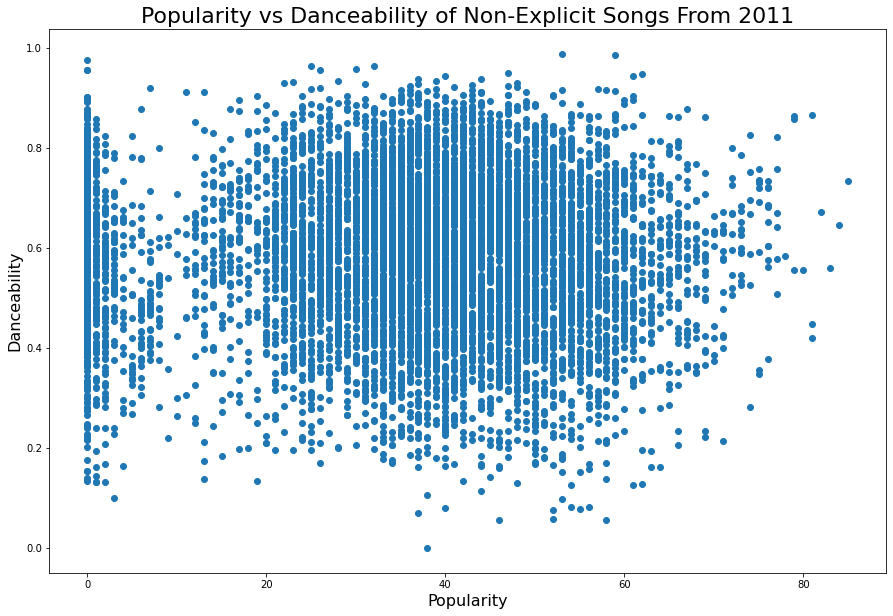

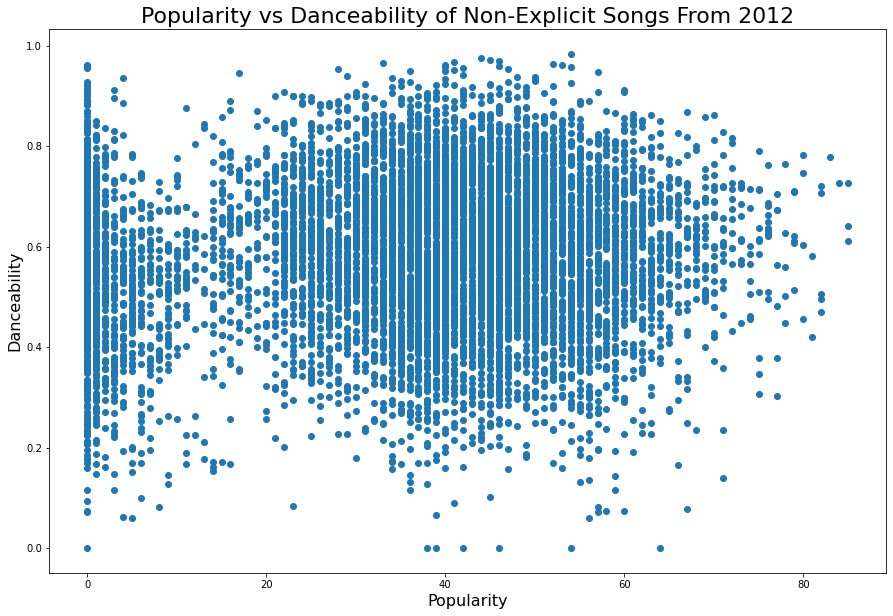

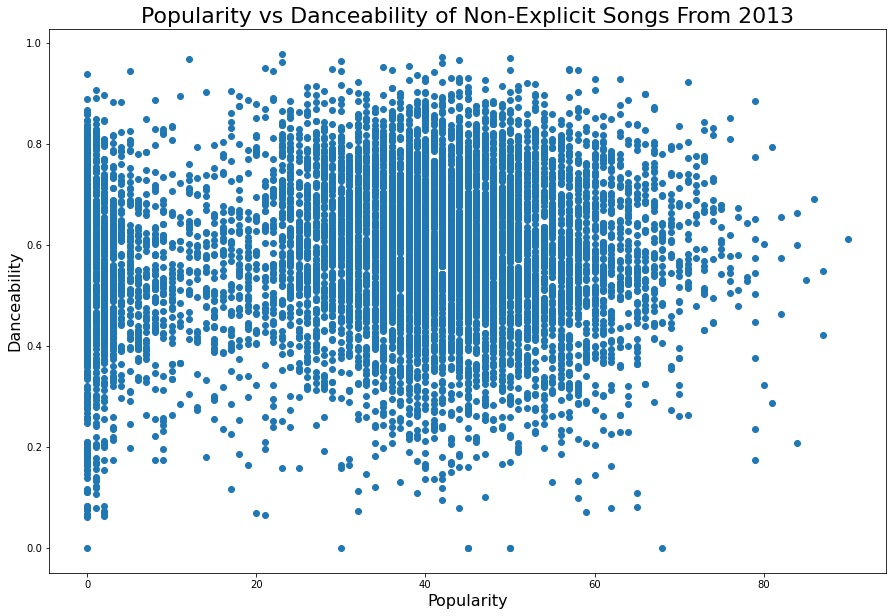

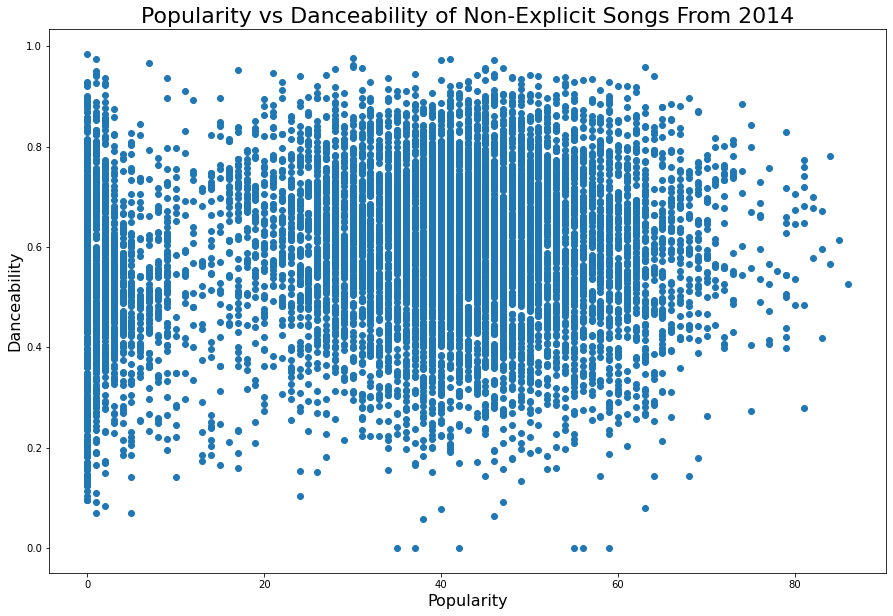

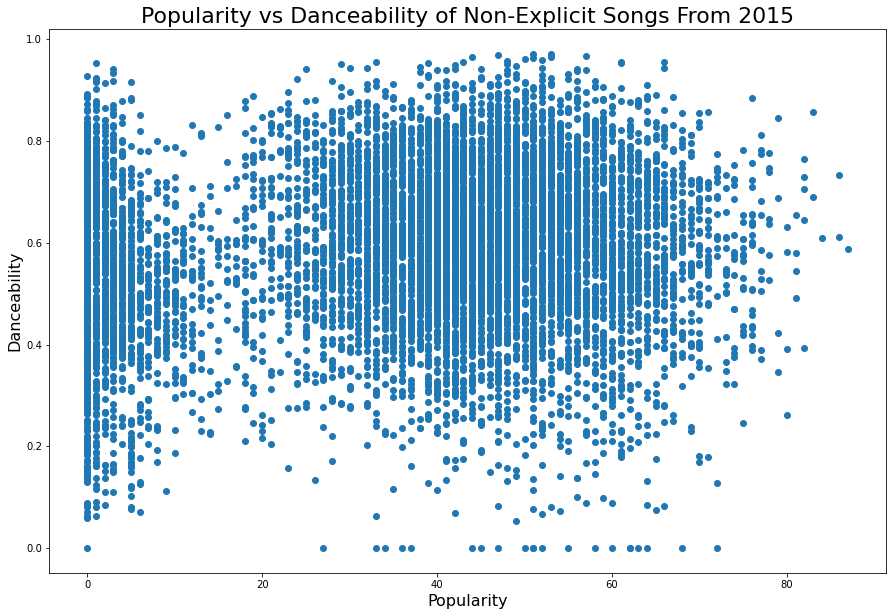

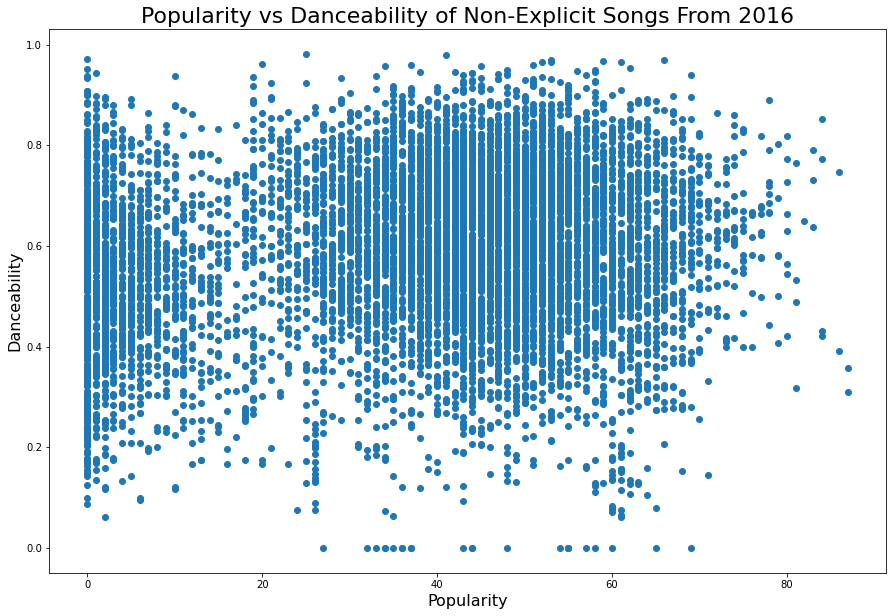

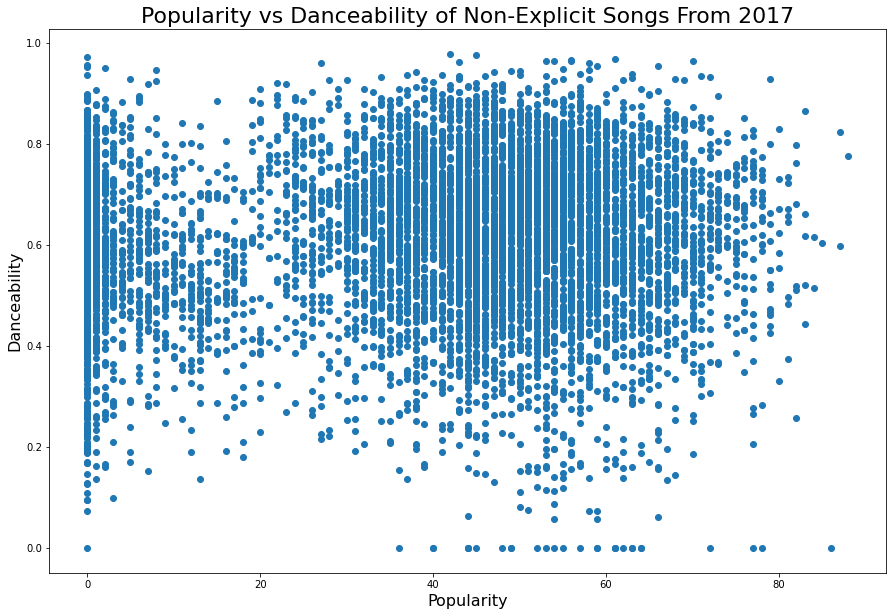

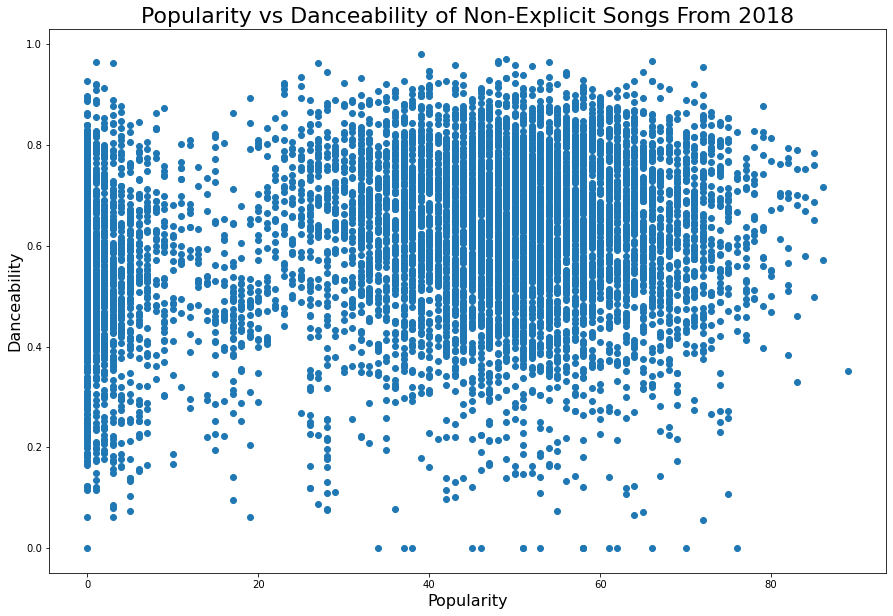

In [47]:
years = range(2010, 2019)
for i in years:
    by_year = tracks_ne[tracks_ne['release_date'] == i]
    fig = plt.figure(figsize=(15, 10))
    plt.scatter(x = by_year['popularity'], y = by_year['danceability'])
    plt.ylabel('Danceability', size = 16)
    plt.xlabel('Popularity', size = 16)
    plt.title('Popularity vs Danceability of Non-Explicit Songs From ' + str(i), size = 22)
    by_year = pd.DataFrame()